In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
df = pd.read_csv('dataset.csv')

/var/folders/_h/4nq6vjss06n4c6lxgh67t_rm0000gn/T/ipykernel_5149/112859877.py:1: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset.csv')


In [119]:
df.head()

,Subject,Image Data ID,Data Quality Rating,Group,CTcaudalanteriorcingulateL,CTcaudalmiddlefrontalL,CTcuneusL,CTentorhinalL,CTfusiformL,CTinferiorparietalL,...,FDprecentralR,FDprecuneusR,FDrostralanteriorcingulateR,FDrostralmiddlefrontalR,FDsuperiorfrontalR,FDsuperiorparietalR,FDsuperiortemporalR,FDsupramarginalR,FDtransversetemporalR,FDinsulaR
0,3101.0,I353356,1.0,PD,2.248,2.450,1.879,3.346,2.621,2.384,...,2.1286,2.1516,1.9409,2.1685,2.2665,2.1008,2.2065,2.1208,1.7844,2.1254
1,3104.0,I301552,1.0,Control,2.220,2.533,1.925,3.430,2.544,2.360,...,2.1475,2.1602,1.9567,2.1543,2.2493,2.1469,2.2173,2.1830,1.7808,2.1321
2,3105.0,I226403,1.0,PD,2.056,2.568,1.998,3.056,2.468,2.508,...,2.1284,2.1495,1.9454,2.1431,2.2240,2.1883,2.1926,2.1935,1.7871,2.0905
3,3106.0,I491581,1.0,Control,2.267,2.516,1.986,2.288,2.589,2.320,...,2.0885,2.1266,1.8295,2.1620,2.2266,2.1280,2.1599,2.1561,1.7469,2.0267
4,3108.0,I232161,1.0,PD,2.532,2.580,2.070,3.111,2.678,2.508,...,2.1411,2.1313,1.8824,2.1734,2.2749,2.1478,2.2046,2.1816,1.7674,2.1020


In [120]:
df = df.drop(df.columns[[0, 1, 2]], axis=1)
df = df.dropna()

In [121]:
df.head()

,Group,CTcaudalanteriorcingulateL,CTcaudalmiddlefrontalL,CTcuneusL,CTentorhinalL,CTfusiformL,CTinferiorparietalL,CTinferiortemporalL,CTisthmuscingulateL,CTlateraloccipitalL,...,FDprecentralR,FDprecuneusR,FDrostralanteriorcingulateR,FDrostralmiddlefrontalR,FDsuperiorfrontalR,FDsuperiorparietalR,FDsuperiortemporalR,FDsupramarginalR,FDtransversetemporalR,FDinsulaR
0,PD,2.248,2.450,1.879,3.346,2.621,2.384,2.831,2.096,2.101,...,2.1286,2.1516,1.9409,2.1685,2.2665,2.1008,2.2065,2.1208,1.7844,2.1254
1,Control,2.220,2.533,1.925,3.430,2.544,2.360,2.811,2.412,2.265,...,2.1475,2.1602,1.9567,2.1543,2.2493,2.1469,2.2173,2.1830,1.7808,2.1321
2,PD,2.056,2.568,1.998,3.056,2.468,2.508,2.743,2.008,2.169,...,2.1284,2.1495,1.9454,2.1431,2.2240,2.1883,2.1926,2.1935,1.7871,2.0905
3,Control,2.267,2.516,1.986,2.288,2.589,2.320,2.808,2.093,2.205,...,2.0885,2.1266,1.8295,2.1620,2.2266,2.1280,2.1599,2.1561,1.7469,2.0267
4,PD,2.532,2.580,2.070,3.111,2.678,2.508,2.724,2.255,2.358,...,2.1411,2.1313,1.8824,2.1734,2.2749,2.1478,2.2046,2.1816,1.7674,2.1020


In [122]:
df.dtypes

Group                          object
CTcaudalanteriorcingulateL    float64
CTcaudalmiddlefrontalL        float64
CTcuneusL                     float64
CTentorhinalL                 float64
                               ...   
FDsuperiorparietalR           float64
FDsuperiortemporalR           float64
FDsupramarginalR              float64
FDtransversetemporalR         float64
FDinsulaR                     float64
Length: 125, dtype: object

In [123]:
(df['Group'].value_counts())

Group
PD         96
Control    61
Name: count, dtype: int64

In [124]:
grouped_data = df.groupby('Group')

In [125]:
CT_columns = df.iloc[:,1:63]
FD_columns = df.iloc[:,63:126]

In [126]:
CT_columns.head()

,CTcaudalanteriorcingulateL,CTcaudalmiddlefrontalL,CTcuneusL,CTentorhinalL,CTfusiformL,CTinferiorparietalL,CTinferiortemporalL,CTisthmuscingulateL,CTlateraloccipitalL,CTlateralorbitofrontalL,...,CTprecentralR,CTprecuneusR,CTrostralanteriorcingulateR,CTrostralmiddlefrontalR,CTsuperiorfrontalR,CTsuperiorparietalR,CTsuperiortemporalR,CTsupramarginalR,CTtransversetemporalR,CTinsulaR
0,2.248,2.450,1.879,3.346,2.621,2.384,2.831,2.096,2.101,2.402,...,2.184,2.431,2.135,2.356,2.303,2.136,2.692,2.405,2.401,3.009
1,2.220,2.533,1.925,3.430,2.544,2.360,2.811,2.412,2.265,2.505,...,2.498,2.373,2.802,2.353,2.487,2.214,2.724,2.555,2.571,2.978
2,2.056,2.568,1.998,3.056,2.468,2.508,2.743,2.008,2.169,2.515,...,2.500,2.399,2.330,2.286,2.424,2.472,2.639,2.576,2.296,2.761
3,2.267,2.516,1.986,2.288,2.589,2.320,2.808,2.093,2.205,2.427,...,2.118,2.390,2.550,2.406,2.527,2.093,2.481,2.399,2.270,2.571
4,2.532,2.580,2.070,3.111,2.678,2.508,2.724,2.255,2.358,2.656,...,2.620,2.543,2.608,2.364,2.644,2.341,2.849,2.677,2.528,2.996


In [127]:
FD_columns.head()

,FDcaudalanteriorcingulateL,FDcaudalmiddlefrontalL,FDcuneusL,FDentorhinalL,FDfusiformL,FDinferiorparietalL,FDinferiortemporalL,FDisthmuscingulateL,FDlateraloccipitalL,FDlateralorbitofrontalL,...,FDprecentralR,FDprecuneusR,FDrostralanteriorcingulateR,FDrostralmiddlefrontalR,FDsuperiorfrontalR,FDsuperiorparietalR,FDsuperiortemporalR,FDsupramarginalR,FDtransversetemporalR,FDinsulaR
0,2.0273,2.1201,2.0268,1.9541,2.1656,2.2215,2.1681,1.9506,2.1748,2.1162,...,2.1286,2.1516,1.9409,2.1685,2.2665,2.1008,2.2065,2.1208,1.7844,2.1254
1,1.9507,2.1208,2.0639,1.9039,2.1167,2.2335,2.1652,1.9657,2.2008,2.1159,...,2.1475,2.1602,1.9567,2.1543,2.2493,2.1469,2.2173,2.1830,1.7808,2.1321
2,1.9402,2.1624,1.9870,1.9581,2.1239,2.2310,2.1678,1.9162,2.1886,2.1290,...,2.1284,2.1495,1.9454,2.1431,2.2240,2.1883,2.1926,2.1935,1.7871,2.0905
3,1.9785,2.1176,1.9943,1.7983,2.0892,2.2057,2.1472,1.8828,2.1707,2.0896,...,2.0885,2.1266,1.8295,2.1620,2.2266,2.1280,2.1599,2.1561,1.7469,2.0267
4,2.0093,2.1510,2.0009,1.8955,2.1400,2.2453,2.1543,1.9428,2.2092,2.1363,...,2.1411,2.1313,1.8824,2.1734,2.2749,2.1478,2.2046,2.1816,1.7674,2.1020


In [128]:
cortical_thickness_mean = grouped_data[CT_columns.columns].mean()
fractal_dimensionality_mean = grouped_data[FD_columns.columns].mean()

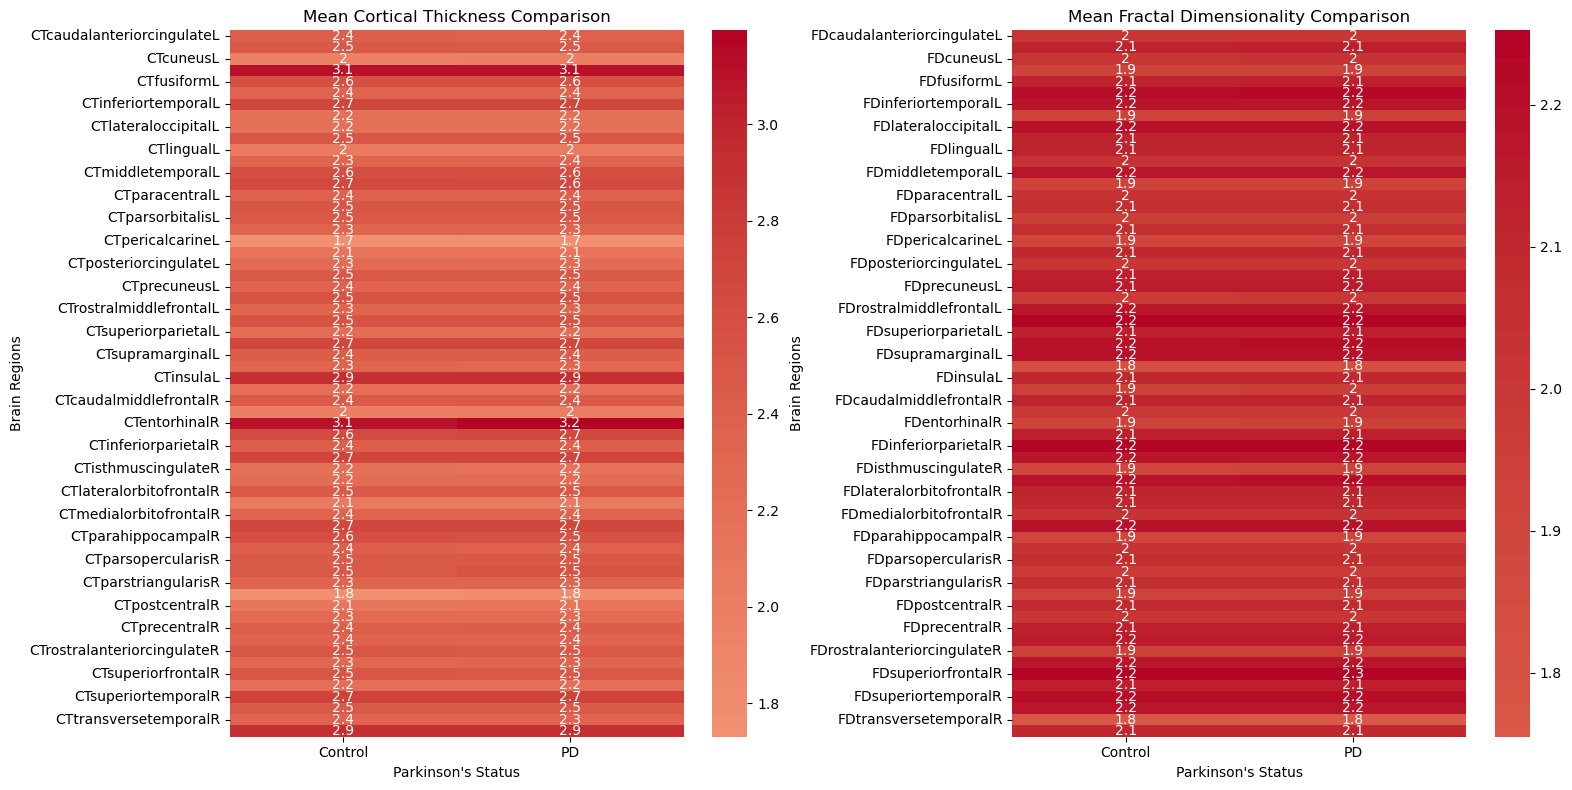

In [133]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

sns.heatmap(data=cortical_thickness_mean.transpose(), annot=True, cmap='coolwarm', center=0, ax=axes[0])
axes[0].set_title('Mean Cortical Thickness Comparison')
axes[0].set_ylabel('Brain Regions')
axes[0].set_xlabel('Parkinson\'s Status')

sns.heatmap(data=fractal_dimensionality_mean.transpose(), annot=True, cmap='coolwarm', center=0, ax=axes[1])
axes[1].set_title('Mean Fractal Dimensionality Comparison')
axes[1].set_ylabel('Brain Regions')
axes[1].set_xlabel('Parkinson\'s Status')

plt.tight_layout()
plt.show()

In [134]:
X = CT_columns 
y = df['Group']

In [175]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

In [176]:
rf_classifier.fit(X, y)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [177]:
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns).sort_values(ascending=False)

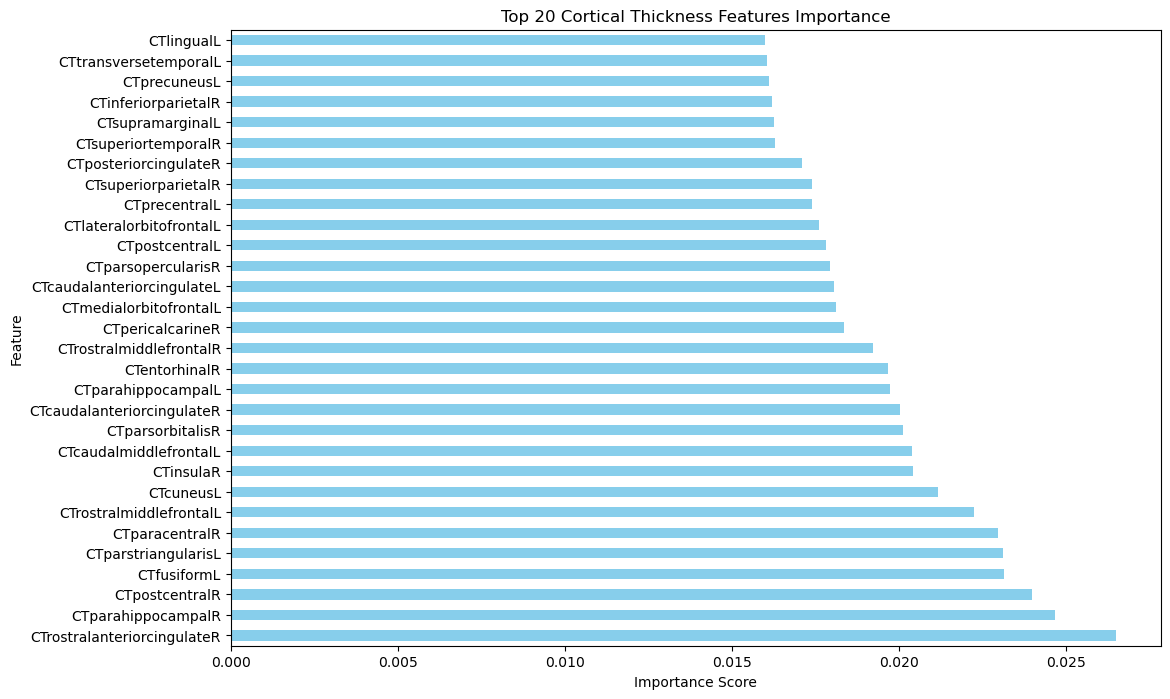

In [178]:
plt.figure(figsize=(12, 8))
feature_importances[:30].plot(kind='barh', color='skyblue')
plt.title('Top 20 Cortical Thickness Features Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [179]:
from sklearn.ensemble import GradientBoostingClassifier

In [142]:
gb_classifier = GradientBoostingClassifier(random_state=42)

In [143]:
gb_classifier.fit(X, y)

GradientBoostingClassifier(random_state=42)

In [144]:
gb_feature_importances = pd.Series(gb_classifier.feature_importances_, index=X.columns).sort_values(ascending=False)

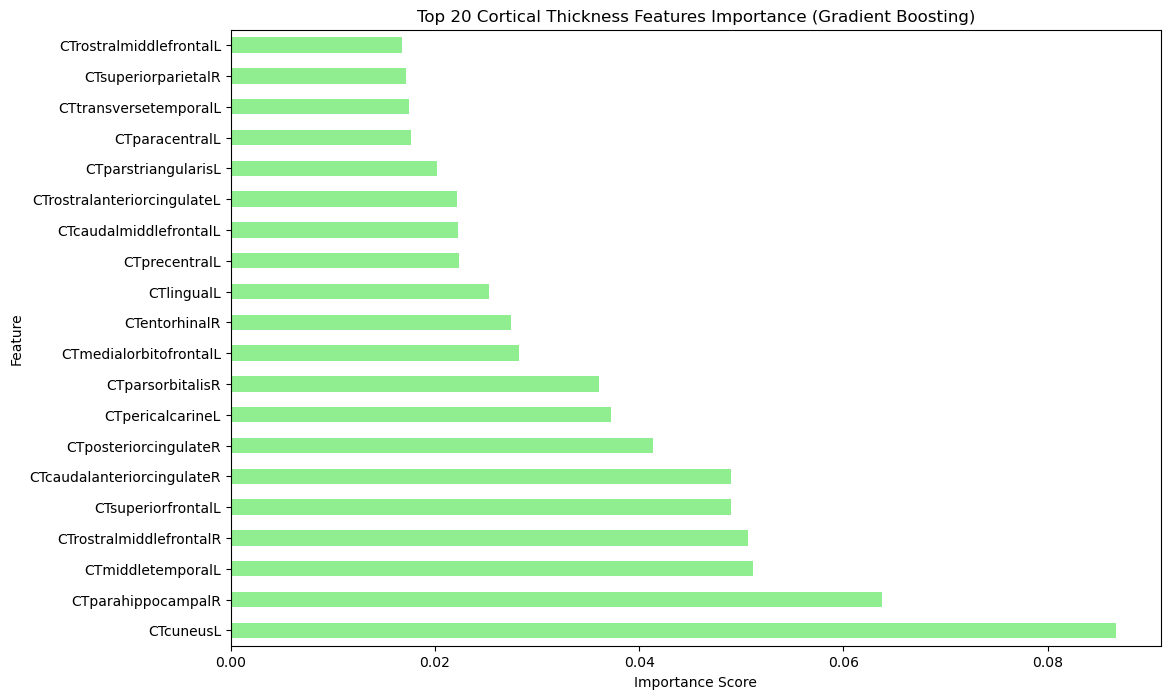

In [145]:
plt.figure(figsize=(12, 8))
gb_feature_importances[:20].plot(kind='barh', color='lightgreen')
plt.title('Top 20 Cortical Thickness Features Importance (Gradient Boosting)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [182]:
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [183]:
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 0.5625
